In [20]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import MinMaxScaler, normalize
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.ensemble import RandomForestClassifier

from scipy.cluster.hierarchy import dendrogram, linkage
from scipy.spatial.distance import pdist, squareform

from PlottingFunctions import plot_inertia, plot_silhouette

In [21]:
%run extract_data.py

Your data is ready! Merged table name is zillow_full.


In [22]:
zillow_full = zillow_full.drop(['PersonalIncome', 'AQIMean', 'Vol_moderate_income', 'Vol_low_income'], axis=1)

In [23]:
# SF Metro
counties_sf = ['Alameda County', 'Contra Costa County', 'Marin County', 'Napa County', 'San Mateo County', 
            'Santa Clara County', 'Solano County', 'Sonoma County', 'San Francisco County']
# NY Metro:
counties_ny = ['New York County', 'Bronx County', 'Queens County', 'Kings County', 'Richmond County']
# Greater Austin Metro:
counties_au = ['Bastrop County', 'Caldwell County', 'Hays County', 'Travis County', 'Williamson County']
# Miami Metro:
counties_mi = ['Miami-Dade County', 'Broward County', 'Palm Beach County']

In [24]:
zillow = zillow_full[zillow_full['County'].isin(counties_sf+counties_ny+counties_au+counties_mi)].reset_index().drop('index', axis=1)
zillow.head()

,Zipcode,City,State,Metro,County,SizeRank,Date,Rent,Year,State-County,...,pct_poverty,housing_availability,home_density,pct_employed,pct_jobs_nightlife,pct_unemployed,move_within_city,move_new_city,avg_commute_time,pct_college
0,10025,New York,NY,New York-Newark-Jersey City,New York County,1,2015-01-01,3566.0,2015,NY-New York County,...,0.145510,1.153877,2.214388,0.932888,0.088021,0.066820,0.084888,0.051420,30.096886,0.216281
1,10023,New York,NY,New York-Newark-Jersey City,New York County,3,2015-01-01,3413.0,2015,NY-New York County,...,0.082199,1.231472,1.853056,0.955315,0.082397,0.044685,0.073276,0.039193,27.057535,0.262305
2,10002,New York,NY,New York-Newark-Jersey City,New York County,7,2015-01-01,3508.0,2015,NY-New York County,...,0.276575,1.065116,2.235927,0.929920,0.168466,0.070080,0.051605,0.018042,30.594358,0.172389
3,11226,New York,NY,New York-Newark-Jersey City,Kings County,11,2015-01-01,1876.0,2015,NY-Kings County,...,0.174138,1.097732,2.729889,0.928099,0.103083,0.071901,0.045075,0.010311,42.388151,0.127736
4,10467,New York,NY,New York-Newark-Jersey City,Bronx County,12,2015-01-01,1442.0,2015,NY-Bronx County,...,0.278866,1.048949,2.824023,0.874915,0.129880,0.125085,0.093202,0.008001,43.596975,0.086000


In [25]:
zillow_cluster = zillow.select_dtypes(exclude = ["object"])
# zillow_cluster = zillow_cluster[zillow_cluster['Year']==2020]
zillow_cluster = zillow_cluster.drop(['Date', 'SizeRank', 'Rent', 'Year'], axis=1)
zillow_cluster

,total_pop,households,median_age,median_income,income_per_capita,gini_index,pct_poverty,housing_availability,home_density,pct_employed,pct_jobs_nightlife,pct_unemployed,move_within_city,move_new_city,avg_commute_time,pct_college
0,92805.0,41910.0,41.3,85930.0,72802.0,0.5968,0.145510,1.153877,2.214388,0.932888,0.088021,0.066820,0.084888,0.051420,30.096886,0.216281
1,62435.0,33693.0,43.3,130452.0,119276.0,0.5604,0.082199,1.231472,1.853056,0.955315,0.082397,0.044685,0.073276,0.039193,27.057535,0.262305
2,74993.0,33540.0,43.6,35859.0,32694.0,0.5838,0.276575,1.065116,2.235927,0.929920,0.168466,0.070080,0.051605,0.018042,30.594358,0.172389
3,100277.0,36733.0,34.7,52052.0,26057.0,0.4631,0.174138,1.097732,2.729889,0.928099,0.103083,0.071901,0.045075,0.010311,42.388151,0.127736
4,103732.0,36732.0,33.7,37015.0,19100.0,0.4810,0.278866,1.048949,2.824023,0.874915,0.129880,0.125085,0.093202,0.008001,43.596975,0.086000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17746,27125.0,7217.0,35.6,67461.0,22831.0,0.4111,0.152349,1.076348,3.758487,0.926849,0.118820,0.073151,0.064774,0.016516,45.186076,0.105364
17747,20077.0,5581.0,36.9,75242.0,28190.0,0.4095,0.110755,1.076510,3.597384,0.908314,0.064390,0.091686,0.053295,0.014245,46.974765,0.091597
17748,14650.0,4633.0,40.6,78990.0,33892.0,0.4359,0.120030,1.085258,3.162098,0.915833,0.117797,0.084167,0.056246,0.006280,40.697500,0.187850
17749,5981.0,2954.0,32.7,148590.0,87893.0,0.3626,0.055509,1.376439,2.024712,0.963464,0.034176,0.036536,0.136599,0.120883,28.097646,0.328373


# Normalizing data for clustering

In [26]:
zillow_cluster_norm = pd.DataFrame(normalize(zillow_cluster,axis=0),columns=zillow_cluster.columns)
zillow_cluster_norm

,total_pop,households,median_age,median_income,income_per_capita,gini_index,pct_poverty,housing_availability,home_density,pct_employed,pct_jobs_nightlife,pct_unemployed,move_within_city,move_new_city,avg_commute_time,pct_college
0,0.013494,0.016561,0.008120,0.008067,0.010806,0.009306,0.006148,0.007598,0.006048,0.007459,0.005775,0.007529,0.008591,0.005147,0.006753,0.008259
1,0.009078,0.013314,0.008513,0.012247,0.017704,0.008738,0.003473,0.008109,0.005061,0.007638,0.005406,0.005035,0.007416,0.003923,0.006071,0.010016
2,0.010904,0.013253,0.008572,0.003367,0.004853,0.009103,0.011685,0.007013,0.006107,0.007435,0.011053,0.007897,0.005223,0.001806,0.006865,0.006583
3,0.014580,0.014515,0.006822,0.004887,0.003868,0.007221,0.007357,0.007228,0.007456,0.007421,0.006763,0.008102,0.004562,0.001032,0.009512,0.004878
4,0.015082,0.014515,0.006625,0.003475,0.002835,0.007500,0.011782,0.006907,0.007713,0.006996,0.008522,0.014095,0.009433,0.000801,0.009783,0.003284
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17746,0.003944,0.002852,0.006999,0.006333,0.003389,0.006410,0.006437,0.007087,0.010265,0.007411,0.007796,0.008243,0.006556,0.001653,0.010139,0.004023
17747,0.002919,0.002205,0.007254,0.007064,0.004184,0.006385,0.004679,0.007088,0.009825,0.007263,0.004225,0.010331,0.005394,0.001426,0.010541,0.003498
17748,0.002130,0.001831,0.007982,0.007416,0.005031,0.006797,0.005071,0.007146,0.008637,0.007323,0.007729,0.009484,0.005693,0.000629,0.009132,0.007173
17749,0.000870,0.001167,0.006429,0.013950,0.013046,0.005654,0.002345,0.009063,0.005530,0.007704,0.002242,0.004117,0.013825,0.012100,0.006305,0.012539


In [27]:
kmeans = KMeans()

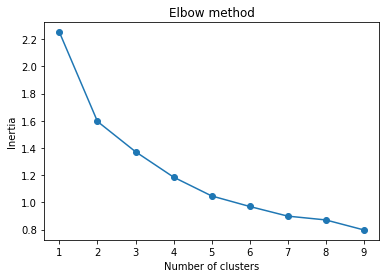

In [28]:
plot_inertia(kmeans, zillow_cluster_norm, range(1, 10))

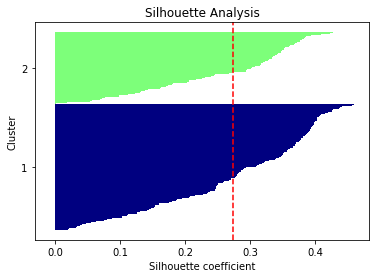

In [29]:
kmeans.set_params(n_clusters=2)
plot_silhouette(kmeans, zillow_cluster_norm)

### KMeans doesn't seem to have worked well. Trying Hierarchical clustering instead

In [30]:
hier = AgglomerativeClustering()

In [31]:
def linkage_frame(data):
    row_clusters = linkage(data, method='complete', metric='euclidean')
    columns = ['row label 1', 'row label 2', 'distance', 'no. items in clust.']
    index = ['cluster %d' % (i + 1) for i in range(row_clusters.shape[0])]
    linkage_df = pd.DataFrame(row_clusters, columns=columns, index=index)
    return linkage_df

In [32]:
linkage_df = linkage_frame(zillow_cluster_norm.values)
linkage_df.head()

,row label 1,row label 2,distance,no. items in clust.
cluster 1,0.0,291.0,0.0,2.0
cluster 2,1.0,292.0,0.0,2.0
cluster 3,2.0,293.0,0.0,2.0
cluster 4,3.0,294.0,0.0,2.0
cluster 5,4.0,295.0,0.0,2.0


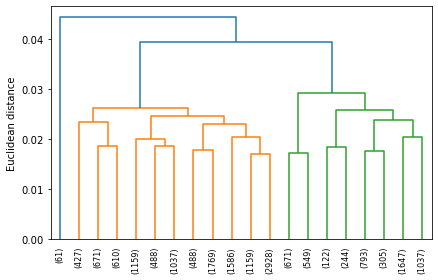

In [33]:
row_dendr = dendrogram(linkage_df, leaf_rotation=90, truncate_mode='lastp', p=20, leaf_font_size=8)
plt.tight_layout()
plt.ylabel('Euclidean distance')
plt.show()

In [34]:
hier.set_params(n_clusters=4)
hier.fit(zillow_cluster_norm)
label = hier.labels_

In [35]:
clusters = pd.DataFrame({'Clusters':hier.labels_})

In [36]:
zillow_new = pd.concat([zillow, clusters], axis=1)
zillow_new.head()

,Zipcode,City,State,Metro,County,SizeRank,Date,Rent,Year,State-County,...,housing_availability,home_density,pct_employed,pct_jobs_nightlife,pct_unemployed,move_within_city,move_new_city,avg_commute_time,pct_college,Clusters
0,10025,New York,NY,New York-Newark-Jersey City,New York County,1,2015-01-01,3566.0,2015,NY-New York County,...,1.153877,2.214388,0.932888,0.088021,0.066820,0.084888,0.051420,30.096886,0.216281,2
1,10023,New York,NY,New York-Newark-Jersey City,New York County,3,2015-01-01,3413.0,2015,NY-New York County,...,1.231472,1.853056,0.955315,0.082397,0.044685,0.073276,0.039193,27.057535,0.262305,1
2,10002,New York,NY,New York-Newark-Jersey City,New York County,7,2015-01-01,3508.0,2015,NY-New York County,...,1.065116,2.235927,0.929920,0.168466,0.070080,0.051605,0.018042,30.594358,0.172389,2
3,11226,New York,NY,New York-Newark-Jersey City,Kings County,11,2015-01-01,1876.0,2015,NY-Kings County,...,1.097732,2.729889,0.928099,0.103083,0.071901,0.045075,0.010311,42.388151,0.127736,2
4,10467,New York,NY,New York-Newark-Jersey City,Bronx County,12,2015-01-01,1442.0,2015,NY-Bronx County,...,1.048949,2.824023,0.874915,0.129880,0.125085,0.093202,0.008001,43.596975,0.086000,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17746,11416,New York,NY,New York-Newark-Jersey City,Queens County,1818,2020-01-01,2184.0,2020,NY-Queens County,...,1.076348,3.758487,0.926849,0.118820,0.073151,0.064774,0.016516,45.186076,0.105364,0
17747,11436,New York,NY,New York-Newark-Jersey City,Queens County,1820,2020-01-01,2057.0,2020,NY-Queens County,...,1.076510,3.597384,0.908314,0.064390,0.091686,0.053295,0.014245,46.974765,0.091597,0
17748,11366,New York,NY,New York-Newark-Jersey City,Queens County,1826,2020-01-01,2185.0,2020,NY-Queens County,...,1.085258,3.162098,0.915833,0.117797,0.084167,0.056246,0.006280,40.697500,0.187850,0
17749,11109,New York,NY,New York-Newark-Jersey City,New York County,1828,2020-01-01,3325.0,2020,NY-New York County,...,1.376439,2.024712,0.963464,0.034176,0.036536,0.136599,0.120883,28.097646,0.328373,1


In [37]:
zillow_new.to_csv('all_areas_clusters_hier.csv', index=False)

In [38]:
zillow_new.groupby('Clusters').median()

,SizeRank,Rent,Year,total_pop,households,median_age,median_income,income_per_capita,gini_index,pct_poverty,housing_availability,home_density,pct_employed,pct_jobs_nightlife,pct_unemployed,move_within_city,move_new_city,avg_commute_time,pct_college
Clusters,,,,,,,,,,,,,,,,,,,
0,1084,1977.0,2017,37845.0,13441.0,37.1,60821.0,30361.0,0.46170,0.170541,1.093185,2.885344,0.934598,0.115206,0.064446,0.060738,0.034647,35.442485,0.135260
1,727,3484.0,2017,28722.0,14401.0,36.9,113070.5,89141.0,0.53325,0.100021,1.161526,1.948847,0.962100,0.079533,0.037076,0.101122,0.074852,24.052851,0.308620
2,169,2054.0,2017,76978.0,27761.0,35.6,50797.0,25917.0,0.48870,0.202801,1.074599,2.893980,0.928877,0.105767,0.070595,0.061765,0.008732,41.738053,0.123691
3,836,2293.0,2017,39452.0,14444.0,39.0,83499.0,48272.0,0.46130,0.093001,1.072699,2.623187,0.953219,0.096447,0.044865,0.035477,0.099916,25.771234,0.205036


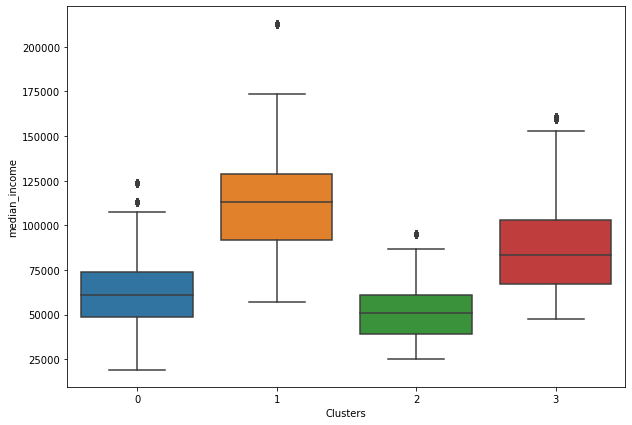

In [52]:
# sns.set_style('ticks')
fig, ax = plt.subplots()
# the size of A4 paper
fig.set_size_inches(10, 7)
ax = sns.boxplot(x="Clusters", y="median_income", data=zillow_new)

# Running ANOVA
#### To find out whether there's at least one cluster that's significantly different from the others across all features.

Run either sample or population
#### Sample (one year - 2016):

In [39]:
cluster_0 = zillow_new[(zillow_new['Clusters']==0) & (zillow_new['Year']==2016)].select_dtypes(exclude = ["object"]).iloc[:,4:-1].sample(40)
cluster_1 = zillow_new[(zillow_new['Clusters']==1) & (zillow_new['Year']==2016)].select_dtypes(exclude = ["object"]).iloc[:,4:-1].sample(40)
cluster_2 = zillow_new[(zillow_new['Clusters']==2) & (zillow_new['Year']==2016)].select_dtypes(exclude = ["object"]).iloc[:,4:-1].sample(40)
cluster_3 = zillow_new[(zillow_new['Clusters']==3) & (zillow_new['Year']==2016)].select_dtypes(exclude = ["object"]).iloc[:,4:-1].sample(40)

#### Population:

In [ ]:
cluster_0 = zillow_new[(zillow_new['Clusters']==0)].select_dtypes(exclude = ["object"]).iloc[:,4:-1]
cluster_1 = zillow_new[(zillow_new['Clusters']==1)].select_dtypes(exclude = ["object"]).iloc[:,4:-1]
cluster_2 = zillow_new[(zillow_new['Clusters']==2)].select_dtypes(exclude = ["object"]).iloc[:,4:-1]
cluster_3 = zillow_new[(zillow_new['Clusters']==3)].select_dtypes(exclude = ["object"]).iloc[:,4:-1]

In [41]:
import scipy.stats as stats
anova_res = {'feature_name': [], 'F_value': [], 'p_value': []}

for col in cluster_0.columns:
    fvalue, pvalue = stats.f_oneway(cluster_0[col], cluster_1[col], cluster_2[col], cluster_3[col])
    anova_res['feature_name'].append(col)
    anova_res['F_value'].append(fvalue)
    anova_res['p_value'].append(pvalue)

anova_res = pd.DataFrame(anova_res)
anova_res

,feature_name,F_value,p_value
0,total_pop,6202.941495,0.0
1,households,4116.109188,0.0
2,median_age,573.794402,0.0
3,median_income,4859.403597,0.0
4,income_per_capita,12359.424932,0.0
5,gini_index,803.370752,0.0
6,pct_poverty,2808.726969,0.0
7,housing_availability,550.047927,0.0
8,home_density,3142.469423,0.0
9,pct_employed,2513.317550,0.0


#### p-values are either extremely small or 0, which means that at least one cluster is significantly different from the others.

# Comparing features across clusters

Applying MinMaxScaler to scale the feature averages in each cluster

In [42]:
min_max_scaler = MinMaxScaler()
zillow_cluster_minmax = pd.DataFrame(min_max_scaler.fit_transform(zillow_cluster), columns=zillow_cluster.columns)
zillow_cluster_minmax

,total_pop,households,median_age,median_income,income_per_capita,gini_index,pct_poverty,housing_availability,home_density,pct_employed,pct_jobs_nightlife,pct_unemployed,move_within_city,move_new_city,avg_commute_time,pct_college
0,0.815678,1.000000,0.516539,0.344349,0.445333,0.763998,0.188895,0.147571,0.250402,0.645912,0.264222,0.352309,0.322380,0.214412,0.377501,0.484731
1,0.530363,0.789070,0.567430,0.574055,0.795277,0.654425,0.079940,0.231701,0.104265,0.782550,0.239230,0.217450,0.276777,0.161566,0.303255,0.605434
2,0.648341,0.785142,0.575064,0.086012,0.143324,0.724865,0.414453,0.051335,0.259114,0.627830,0.621679,0.372170,0.191664,0.070149,0.389653,0.369618
3,0.885874,0.867106,0.348601,0.169559,0.093348,0.361529,0.238163,0.086697,0.458891,0.616736,0.331148,0.383264,0.166020,0.036738,0.677753,0.252508
4,0.918333,0.867081,0.323155,0.091977,0.040963,0.415412,0.418397,0.033806,0.496963,0.292703,0.450220,0.707297,0.355033,0.026754,0.707282,0.143050
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17746,0.198640,0.109431,0.371501,0.249060,0.069057,0.204997,0.200665,0.063512,0.874898,0.609116,0.401079,0.390884,0.243386,0.063555,0.746100,0.193834
17747,0.132426,0.067435,0.404580,0.289205,0.109409,0.200181,0.129083,0.063687,0.809741,0.496188,0.159217,0.503812,0.198302,0.053740,0.789795,0.157729
17748,0.081442,0.043100,0.498728,0.308542,0.152345,0.279651,0.145045,0.073173,0.633694,0.541999,0.396530,0.458001,0.209891,0.019313,0.636453,0.410165
17749,0.000000,0.000000,0.297710,0.667637,0.558967,0.059001,0.034007,0.388876,0.173690,0.832198,0.024960,0.167802,0.525474,0.514639,0.328663,0.778708


In [65]:
zillow_lineplot = pd.concat([zillow_cluster_minmax, clusters], axis=1).groupby('Clusters').median().T.sort_values([1], ascending=False)
zillow_lineplot

Clusters,0,1,2,3
pct_employed,0.656330,0.823885,0.621472,0.769782
pct_college,0.272241,0.726902,0.241898,0.455237
gini_index,0.357315,0.572697,0.438591,0.356111
income_per_capita,0.125757,0.568364,0.092294,0.260625
median_income,0.214801,0.484377,0.163083,0.331806
median_age,0.409669,0.404580,0.371501,0.458015
move_within_city,0.227535,0.386140,0.231569,0.128325
move_new_city,0.141921,0.315687,0.029911,0.424018
households,0.269201,0.293844,0.636795,0.294948
avg_commute_time,0.508083,0.229857,0.661872,0.271833


## Plotting all features to see what the clusters have captured

<ipython-input-66-c53d0a60cafe>:6: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(labels=zillow_lineplot.index, rotation=45)


[Text(0, 0, 'pct_employed'),
 Text(1, 0, 'pct_college'),
 Text(2, 0, 'gini_index'),
 Text(3, 0, 'income_per_capita'),
 Text(4, 0, 'median_income'),
 Text(5, 0, 'median_age'),
 Text(6, 0, 'move_within_city'),
 Text(7, 0, 'move_new_city'),
 Text(8, 0, 'households'),
 Text(9, 0, 'avg_commute_time'),
 Text(10, 0, 'pct_jobs_nightlife'),
 Text(11, 0, 'total_pop'),
 Text(12, 0, 'pct_unemployed'),
 Text(13, 0, 'housing_availability'),
 Text(14, 0, 'home_density'),
 Text(15, 0, 'pct_poverty')]

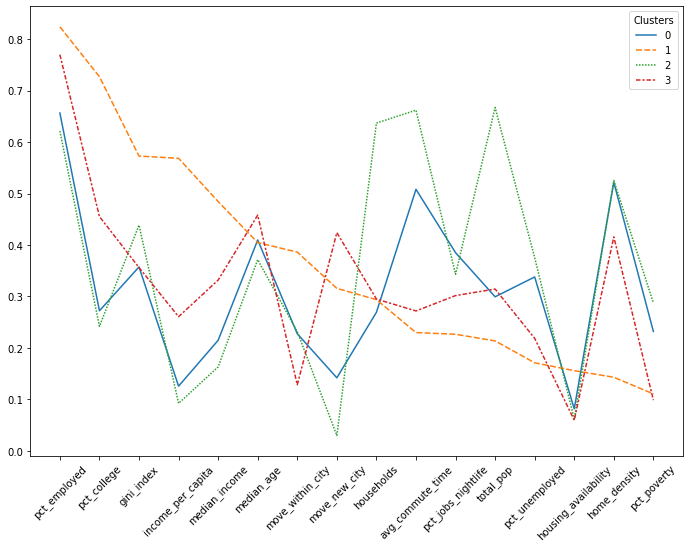

In [66]:
# sns.set_style('ticks')
fig, ax = plt.subplots()
# the size of A4 paper
fig.set_size_inches(11.7, 8.27)
ax = sns.lineplot(data=zillow_lineplot)
ax.set_xticklabels(labels=zillow_lineplot.index, rotation=45)

## Plotting features representing wellfare for better clarity

In [69]:
welfare_features = ['total_pop', 'median_income', 'income_per_capita', 'gini_index', 'pct_employed', 'avg_commute_time', 'pct_college']
zillow_welfare_lineplot = pd.concat([zillow_cluster_minmax[welfare_features], clusters], axis=1).groupby('Clusters').median().T.sort_values([1], ascending=False)
zillow_welfare_lineplot

Clusters,0,1,2,3
pct_employed,0.656330,0.823885,0.621472,0.769782
pct_college,0.272241,0.726902,0.241898,0.455237
gini_index,0.357315,0.572697,0.438591,0.356111
income_per_capita,0.125757,0.568364,0.092294,0.260625
median_income,0.214801,0.484377,0.163083,0.331806
avg_commute_time,0.508083,0.229857,0.661872,0.271833
total_pop,0.299350,0.213643,0.666989,0.314447


<ipython-input-70-47984587a8ab>:6: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(labels=zillow_welfare_lineplot.index, rotation=45)


[Text(0, 0, 'pct_employed'),
 Text(1, 0, 'pct_college'),
 Text(2, 0, 'gini_index'),
 Text(3, 0, 'income_per_capita'),
 Text(4, 0, 'median_income'),
 Text(5, 0, 'avg_commute_time'),
 Text(6, 0, 'total_pop')]

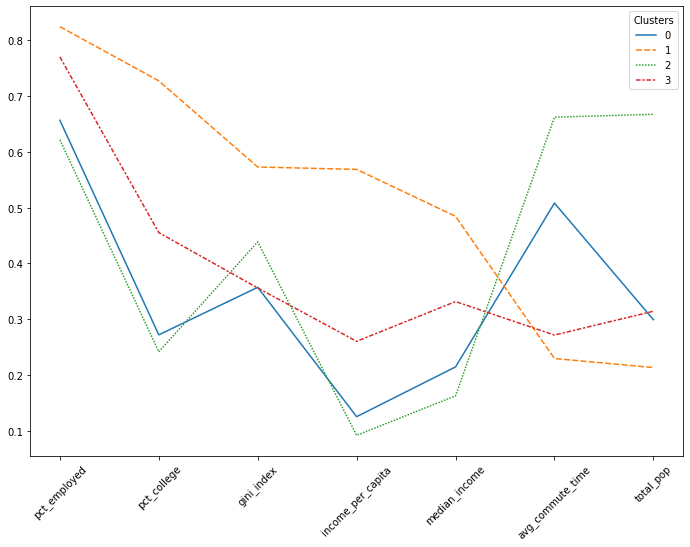

In [70]:
# sns.set_style('ticks')
fig, ax = plt.subplots()
# the size of A4 paper
fig.set_size_inches(11.7, 8.27)
ax = sns.lineplot(data=zillow_welfare_lineplot)
ax.set_xticklabels(labels=zillow_welfare_lineplot.index, rotation=45)